# JHU-CROWD++

JHU-Crowd++ is a large scale crowd counting data set with a total of 4732 images and 1.51 million annotations. The images in the dataset are a collections of wide variety of scenarios and environmental conditions. 

The following is the directory structure of the dataset:
```
jhu_crowd_v2.0
    ├───test
    │   ├───gt
    │   └───images
    ├───train
    │   ├───gt
    │   └───images
    └───val
        ├───gt
        └───images
```
The number of samples in train, val and test split are 2272, 500, 1600 respectively. The 'gt' folder contains the ground truths of each image.



### Ground Truth Annotations:
#### Head-level
Each image contains a ground-truth file in the 'gt' folder which contains a space seperated values in each row.<br>
These values represent x, y, w, h, o, b. <br>

**x, y**: these values indicate the position of head in the image.<br>
**w, h** : these values indicate the approximate width and height of the head.<br>
**o**: indicates occlusion level. (1 = visible, 2 = partial occlusion, 3 = full occlusion)<br>
**b**: indicates blur. (0 = no blur, 1 = blur)<br>

#### Image-level
Each split in the dataset contains a 'image_labels.txt' file. This file contains image level labels. The values in the file are comma seperated.<br>
These values represent filename, total-count, scene-type, weather-condition, distractor.<br>

**filename**: this value represents the name of the image file.<br>
**total-count**: This value represents the number of people in the image.<br>
**scene-type**: This is a image level label describing the scene.<br>
**weather-condition**: This value indicates the weather degradation in the image with values ranging from 0-3.(0=no weather degradation, 1=fog/haze, 2=rain, 3=snow).<br>
**distractor**: This is a boolean value indicating if the image is a distractor.(0=not a distractor, 1=distractor).<br>

### Dataset Stats
#### Number of samples in each set.
***train***: 2272

    Stadium: 296
    Street: 215
    Protest: 168
    Conference: 119
    Railway-Station: 40
    Other: 1434

***val***: 500

    Stadium: 101
    Street: 67
    Protest: 45
    Conference: 43
    Railway-Station: 11
    Other: 233

***test***: 1600
    
    Stadium: 482
    Street: 291
    Protest: 202
    Conference: 178 
    Railway-Station: 60
    Other: 387


### Additional Information
#### Images
***Total***: The dataset contains 4,372 images (with an avg resolution of 1430x910).

***Diverse Environments***: The images were collected under a diverse set of lighting, wather, and other enviorenmental conditions and various geographical locations.

***Annotations***: The dataset contains a total of 1.51 million dot annotations with an average of 346 dots per image and a maximum of 25K dots.

***Head Annotations***: It also provides head-level labels (dots, approx. bounding box, blur-level, etc.) and image-level labels (scene type and weather condition).

### References
Sindagi, Vishwanath A., et al. (2015). JHU-CROWD++: Large-Scale Crowd Counting
Dataset and A Benchmark Meth. Journal of Latex 

    http://www.crowd-counting.com/assets/img/jhucrowdv2.pdf
    

In [2]:
import cv2,os,sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

### Util function to fetch ground-truth values

In [2]:
def getPoints(path):
    '''
    Input: Path to ground-truth folder
    Ouput:
    X: x-value of the position of the head
    Y: y-value of the position of the head
    W: width of the head
    H: height of the head
    O: occlusion level
    B: blur/no blur
    '''
    def getLines(path):
        f = open(path, 'r')
        lines = f.readlines()
        f.close()
        return lines
    def retGT(lines):
        splitdata = []
        for i in lines:
            splitdata.append(i.split(" ")) 
        X = [int(i[0]) for i in splitdata]
        Y = [int(i[1]) for i in splitdata]
        W = [int(i[2]) for i in splitdata]
        H = [int(i[3]) for i in splitdata]
        O = [int(i[4]) for i in splitdata]
        B = [int(i[5]) for i in splitdata]
        return X,Y,W,H,O,B
    return retGT(getLines(path))
    

### Printing data from the image_labels.txt

In [3]:
fname=[]
count = []
scene =[]
weather = []
distractor=[]

with open('jhu_crowd_v2.0/jhu_crowd_v2.0/train/image_labels.txt') as f:
    for i in f.readlines():
        string = i.split(",")
        fname.append(string[0]+'.jpg')
        count.append(string[1])
        scene.append(string[2])
        weather.append(int(string[3]))
        distractor.append(int(string[4][0]))

data = {
    'filename' : fname,
    'total-count': count,
    'scene-type': scene,
    'weather-condition':weather,
    'distractor':distractor,
}

df = pd.DataFrame(data) 
df.head(10)

,filename,total-count,scene-type,weather-condition,distractor
0,0001.jpg,161,water park,0,0
1,0008.jpg,855,marathon,0,0
2,0010.jpg,455,protest,0,0
3,0012.jpg,7139,stadium,0,0
4,0014.jpg,111,protest,0,0
5,0015.jpg,111,stadium,3,0
6,0017.jpg,13,running,0,0
7,0018.jpg,80,stadium,0,0
8,0019.jpg,27,protest,0,0
9,0021.jpg,308,conference,0,0


### Loading all the images 

In [4]:
imagelist = os.listdir('jhu_crowd_v2.0/jhu_crowd_v2.0/train/images')
attlist = os.listdir('jhu_crowd_v2.0/jhu_crowd_v2.0/train/gt/')

### Selecting a random image and displaying the information

filename :  0063.jpg
total-count :  233
scene-type :  stadium
weather-condition :  0
distractor :  0


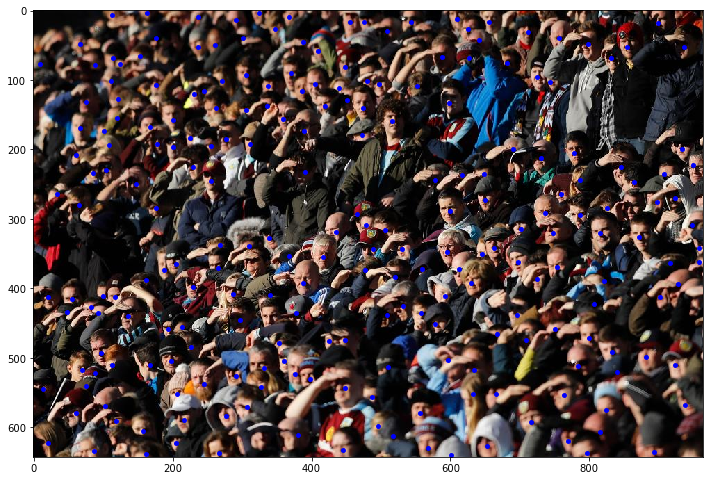

In [5]:
img = mpimg.imread('jhu_crowd_v2.0/jhu_crowd_v2.0/train/images/'+imagelist[39])
X,Y,_,_,_,_ = getPoints('jhu_crowd_v2.0/jhu_crowd_v2.0/train/gt/'+attlist[39])
plt.figure(figsize=(12, 12))
plt.scatter(X,Y, c='blue', s=15)
print('filename : ',df['filename'][39])
print('total-count : ',df['total-count'][39])
print('scene-type : ',df['scene-type'][39])
print('weather-condition : ',df['weather-condition'][39])
print('distractor : ',df['distractor'][39])
plt.imshow(img)

### Displaying 20 random images with people count

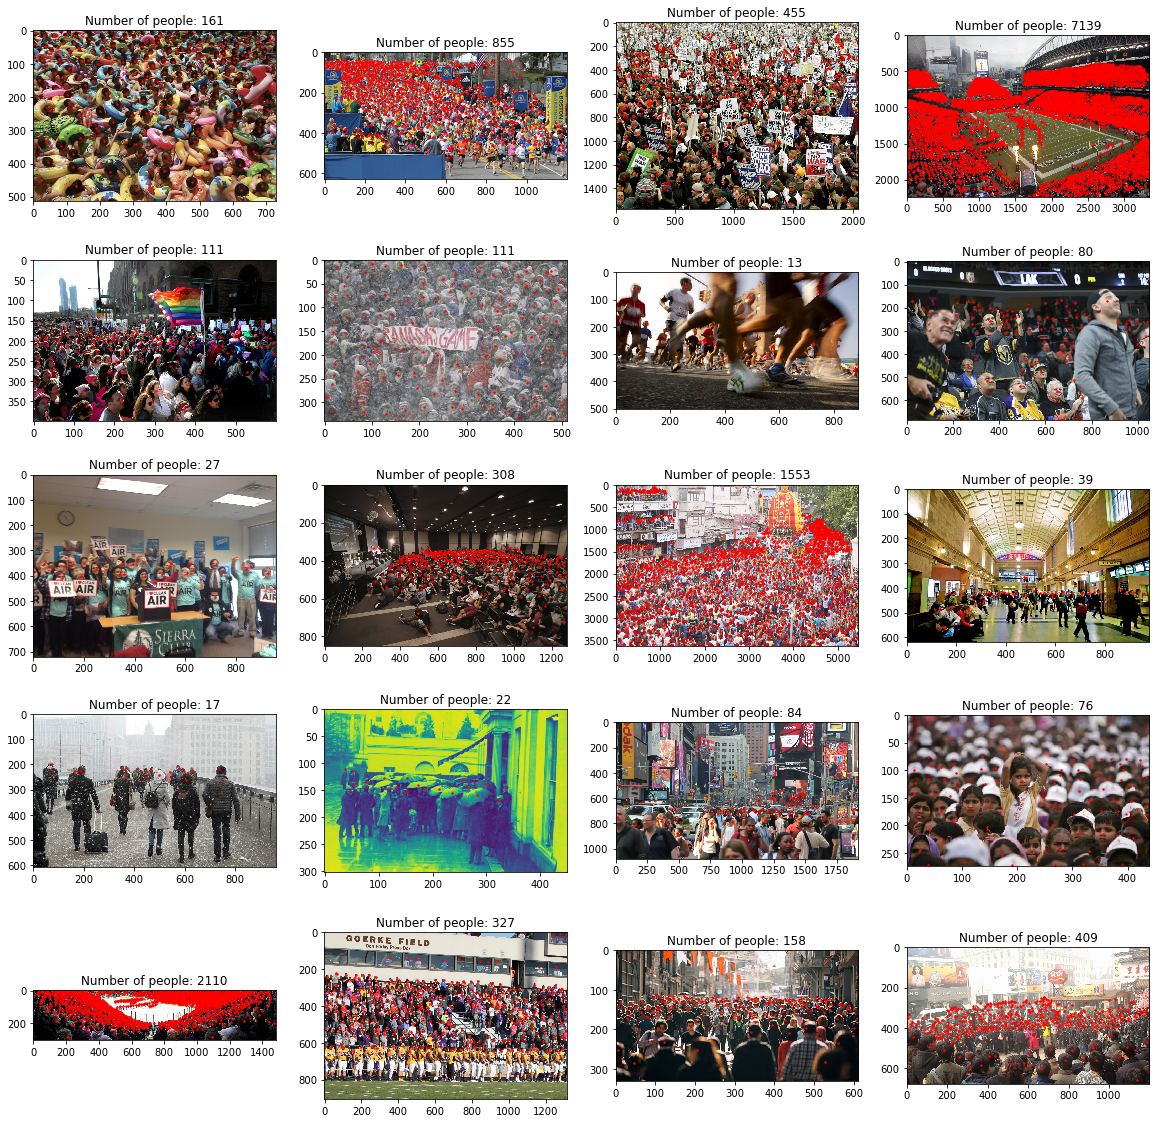

In [6]:
h=20w=20

fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(0, columns*rows):
    img = mpimg.imread('jhu_crowd_v2.0/jhu_crowd_v2.0/train/images/'+imagelist[i])
    X,Y,W,H,O,B = getPoints('jhu_crowd_v2.0/jhu_crowd_v2.0/train/gt/'+attlist[i])
    currplot = fig.add_subplot(rows, columns, i+1)
    currplot.scatter(X,Y, c='r', s=2)
    currplot.set_title("Number of people: "+str(len(X)))
    plt.imshow(img)
plt.show()

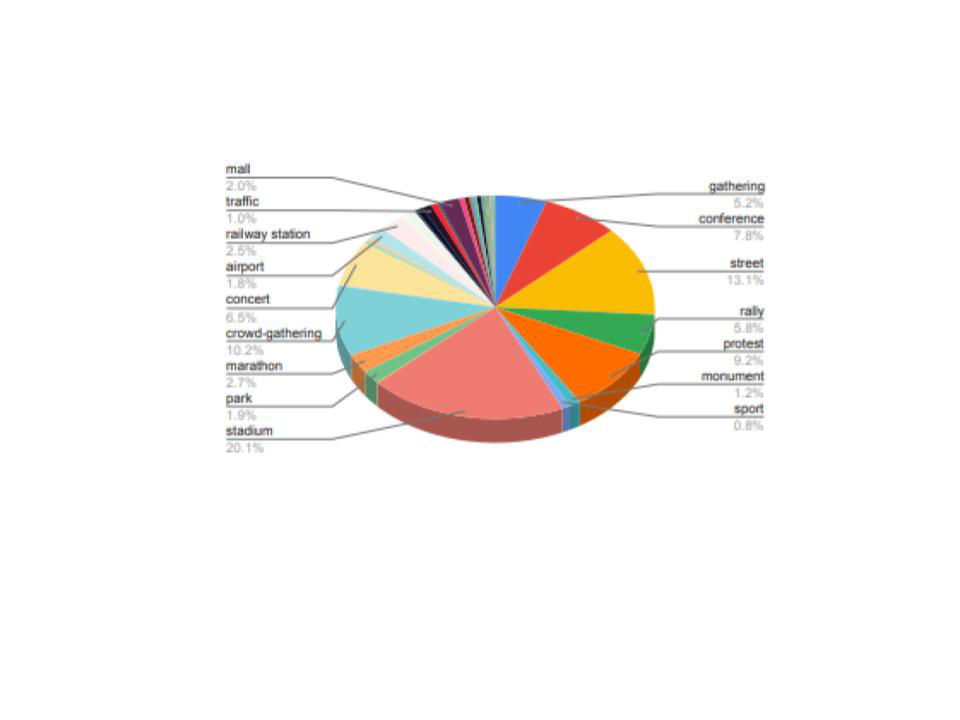

In [29]:
from IPython.display import display
from PIL import Image

display(Image.open('type.jpg'))
# Citation - (Sindagi et al.,2015, p. 5)

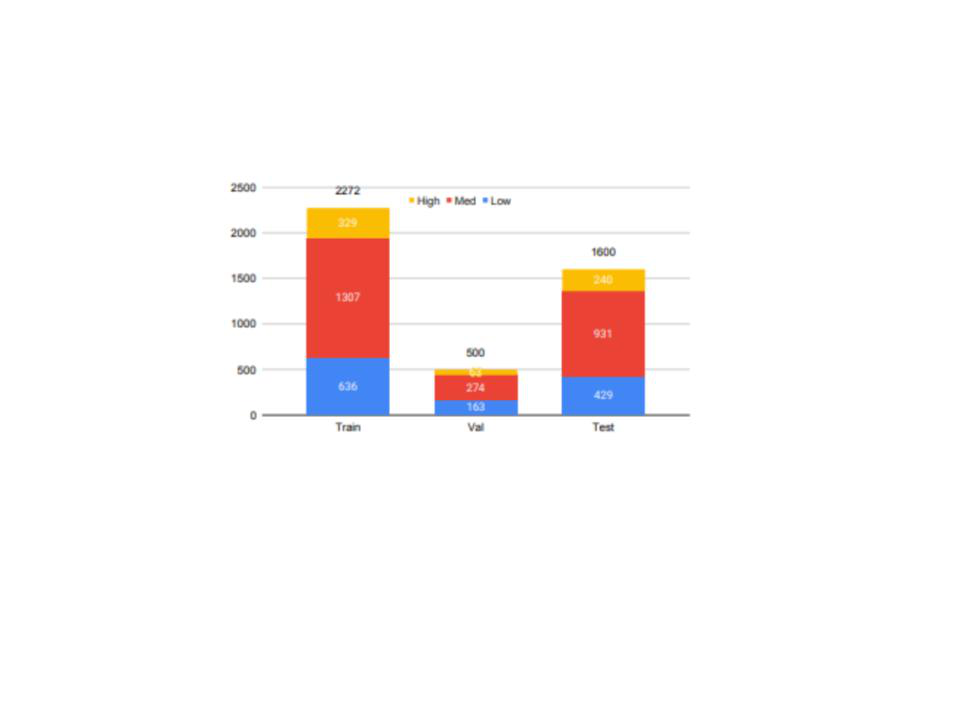

In [30]:
display(Image.open('data1.jpg'))
#Density levels.
# Citation - (Sindagi et al.,2015, p. 6)

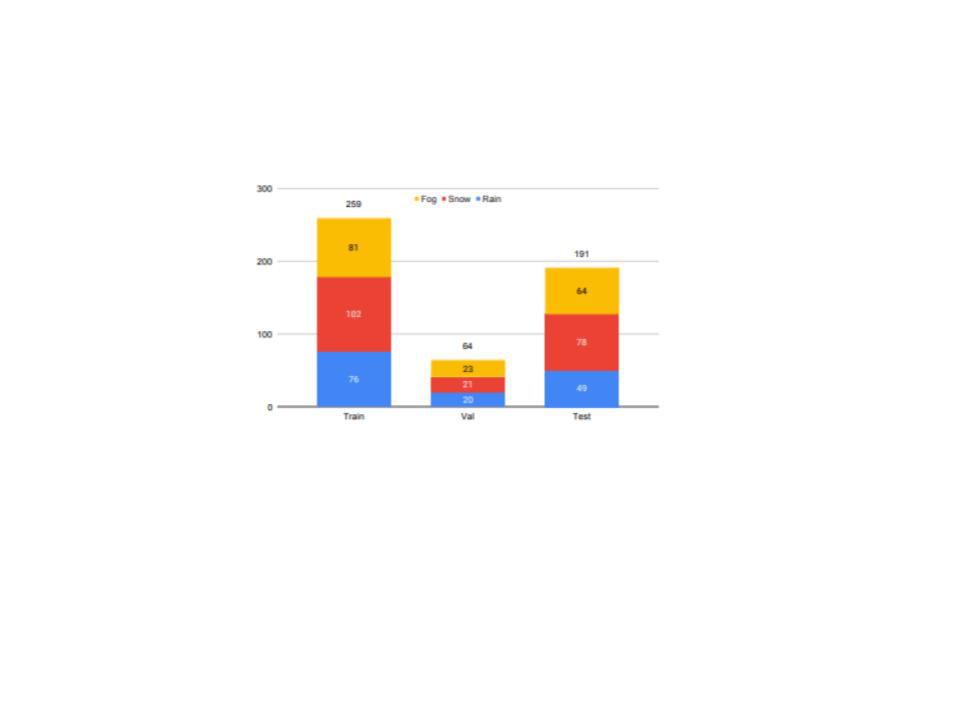

In [14]:
display(Image.open('data2.jpg'))
#Weather Conditions.
# Citation - (Sindagi et al.,2015, p. 5)